In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv("framingham.csv",
                low_memory=False)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [22]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
df.education.value_counts()

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

In [6]:
df.cigsPerDay.value_counts()

cigsPerDay
0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [215]:
df_temp = df.copy()
df_temp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [216]:
df_temp.BPMeds.median()

0.0

In [217]:
df_temp['education'] = df_temp['education'].fillna(df_temp.education.median())
df_temp['currentSmoker'] = df_temp['currentSmoker'].fillna(df_temp.currentSmoker.median())
df_temp['cigsPerDay'] = df_temp['cigsPerDay'].fillna(df_temp.cigsPerDay.median())
df_temp['BPMeds'] = df_temp['BPMeds'].fillna(df_temp.BPMeds.median())

In [218]:
df_temp.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [219]:
for labels,content in df_temp.items():
    if pd.isna(content).any():
        df_temp[labels] = content.fillna(content.mean())
df_temp.isna().sum()
        

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

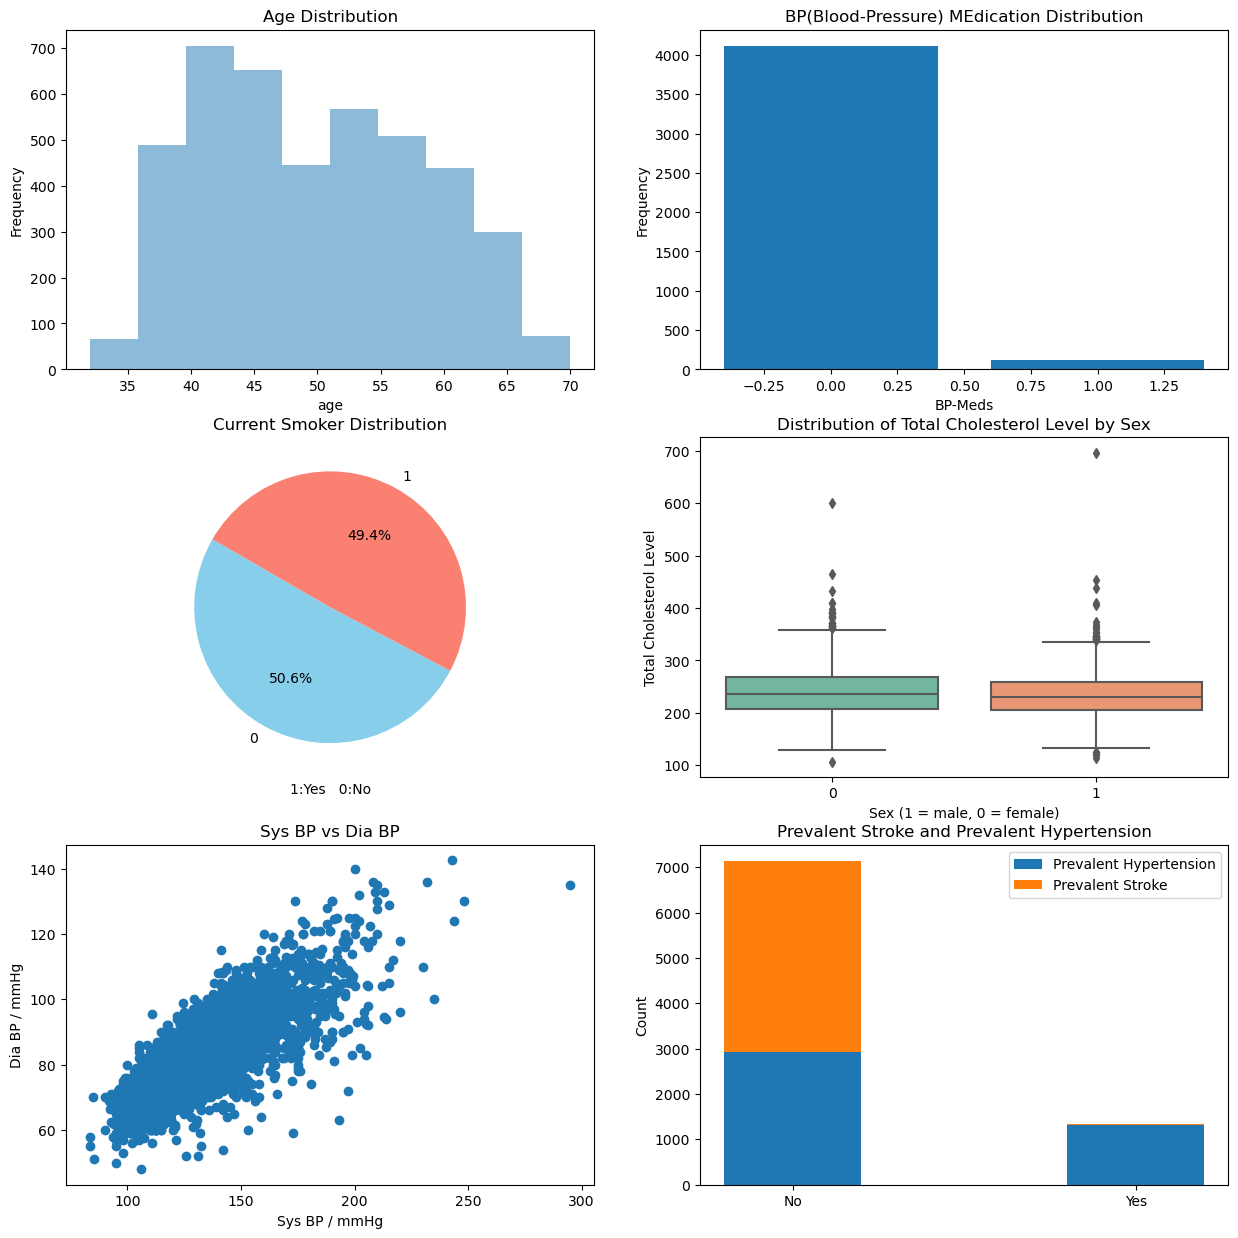

In [251]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
ax[0, 0].hist(df_temp['age'], bins=10, alpha=0.5)
ax[0, 0].set_xlabel('age')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_title('Age Distribution')

# Plot bar chart of Education Level on the second subplot
BP = df_temp['BPMeds'].value_counts()
ax[0, 1].bar(BP.index, BP.values)  # Providing both x and height arguments
ax[0, 1].set_xlabel('BP-Meds')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_title('BP(Blood-Pressure) MEdication Distribution') 

current_smoker_counts = df['currentSmoker'].value_counts()
ax[1, 0].pie(current_smoker_counts, labels=current_smoker_counts.index, autopct='%1.1f%%', startangle=150, colors=['skyblue', 'salmon'])
ax[1, 0].set_title('Current Smoker Distribution')
ax[1,0].set_xlabel('1:Yes   0:No')

sns.boxplot(x='male', y='totChol', data=df_temp, palette='Set2',ax=ax[1, 1])
ax[1,1].set_xlabel('Sex (1 = male, 0 = female)')
ax[1,1].set_ylabel('Total Cholesterol Level')
ax[1,1].set_title('Distribution of Total Cholesterol Level by Sex')

ax[2, 0].scatter(df['sysBP'], df['diaBP'])
ax[2, 0].set_xlabel('Sys BP / mmHg')
ax[2, 0].set_ylabel('Dia BP / mmHg')
ax[2, 0].set_title('Sys BP vs Dia BP')

stroke_counts = df['prevalentStroke'].value_counts()
hyp_counts = df['prevalentHyp'].value_counts()

ax[2, 1].bar([0, 1], hyp_counts, width=0.4, label='Prevalent Hypertension')
ax[2, 1].bar([0, 1], stroke_counts, width=0.4,bottom = hyp_counts ,label='Prevalent Stroke')
ax[2, 1].set_xticks([0, 1])
ax[2, 1].set_xticklabels(['No', 'Yes'])
ax[2, 1].set_ylabel('Count')
ax[2, 1].set_title('Prevalent Stroke and Prevalent Hypertension')
ax[2, 1].legend();

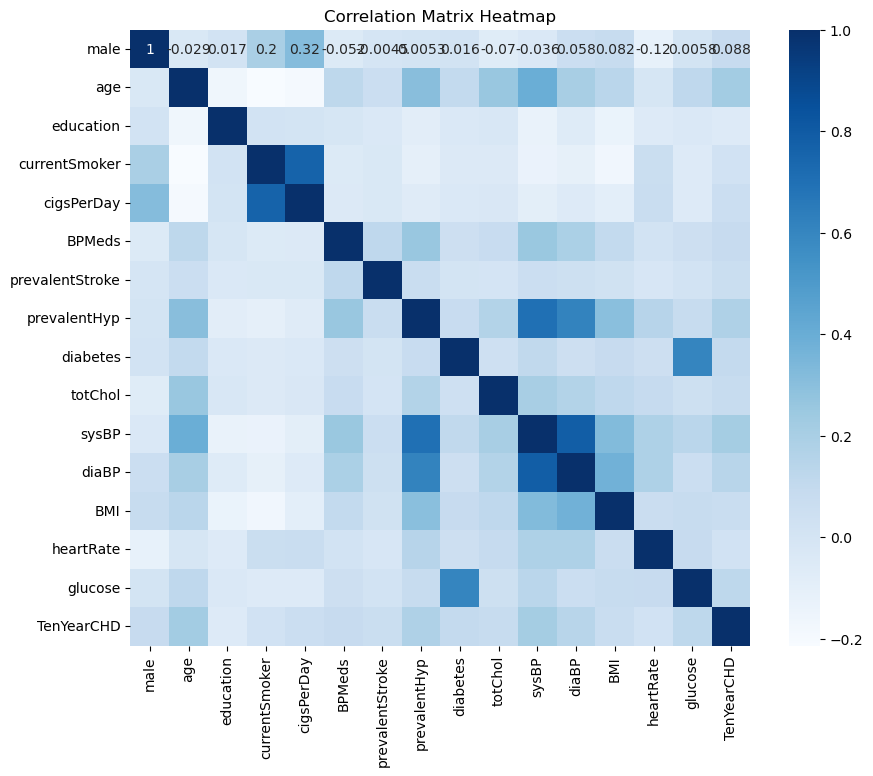

In [250]:
corr_mat = df_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap='Blues', annot=True)
plt.title('Correlation Matrix Heatmap');

# Using Logistic Regression model to predict the target variable

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [226]:
x_train,x_test,y_train,y_test = train_test_split(df_temp.drop('TenYearCHD',axis = 1),df_temp['TenYearCHD'],test_size = 0.2,random_state=42)


In [227]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3390, 15), (848, 15), (3390,), (848,))

In [228]:
Lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100, class_weight=None)

In [229]:
Lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [230]:
y_preds = Lr.predict(x_test)


In [231]:
accuracy = accuracy_score(y_test,y_preds)
print(" Accuracy :", accuracy*100)

 Accuracy : 86.08490566037736


In [232]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.80      0.06      0.12       124

    accuracy                           0.86       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.85      0.86      0.81       848



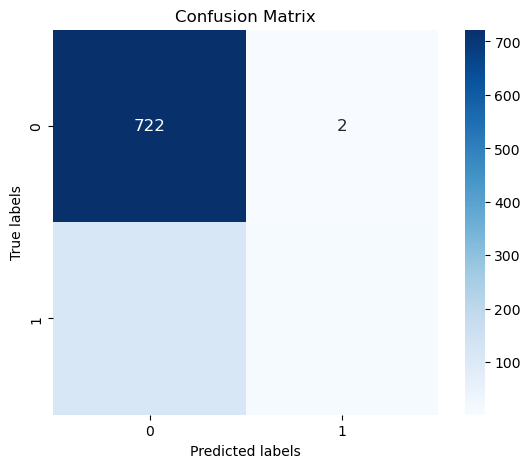

In [233]:

conf_matrix = confusion_matrix(y_test, y_preds)

# Plot confusion matrix as heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',annot_kws={"size": 12} ,square=True)

# Set labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()



# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [234]:
def rscv(data_model,rs_grid,x_train,y_train,x_test,y_test):
    
    improved_model = RandomizedSearchCV(estimator=data_model , param_distributions=rs_grid,cv=5,n_iter=300,verbose = False,random_state = 42)
    improved_model.fit(x_train,y_train)
    best_params = improved_model.best_params_
    best_score = improved_model.best_score_    
    print('Best Parameters : ',best_params)
    print('Best Score:',best_score)
    #chosing the best estimator
    improved_model=improved_model.best_estimator_
    y_pred = improved_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return best_params
    
def gscv(data_model,rs_grid,x_train,y_train,x_test,y_test):

    improved_model = GridSearchCV(estimator=data_model , param_grid=rs_grid,cv=5,scoring='accuracy')
    improved_model.fit(x_train,y_train)
    best_params = improved_model.best_params_
    best_score = improved_model.best_score_    
    print('Best Parameters : ',best_params)
    print('Best Score:',best_score)
    #chosing the best estimator
    improved_model=improved_model.best_estimator_
    y_pred = improved_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return best_params

In [235]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'solver': ['saga','lbgs'],  
    'class_weight': [None, 'balanced'],
    'multi_class': ['ovr'],
    'tol': [1e-3, 1e-4, 1e-5],
    'warm_start': [False, True],
    'n_jobs': [-1]  
}

In [236]:
%%time
Random_mCV_model = rscv(Lr,param_grid,x_train,y_train,x_test,y_test)


C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 288 is smaller than n_iter=300. Running 288 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters :  {'warm_start': False, 'tol': 0.001, 'solver': 'saga', 'penalty': 'l2', 'n_jobs': -1, 'multi_class': 'ovr', 'class_weight': None, 'C': 0.001}
Best Score: 0.8483775811209441
Accuracy: 0.8549528301886793
CPU times: total: 6.48 s
Wall time: 1min 7s


C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

In [237]:
%%time
Grid_search_model = gscv(Lr,param_grid,x_train,y_train,x_test,y_test)

Best Parameters :  {'C': 0.001, 'class_weight': None, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001, 'warm_start': False}
Best Score: 0.8483775811209441
Accuracy: 0.8549528301886793
CPU times: total: 6.62 s
Wall time: 1min 2s


C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

In [238]:
Lr.score(x_test,y_test)

0.8608490566037735

In [239]:
print(accuracy_score(y_test,Lr.predict(x_test)))

0.8608490566037735


In [240]:
Random_mCV_model

{'warm_start': False,
 'tol': 0.001,
 'solver': 'saga',
 'penalty': 'l2',
 'n_jobs': -1,
 'multi_class': 'ovr',
 'class_weight': None,
 'C': 0.001}

In [241]:
Imp_model1 = LogisticRegression(tol= 0.001,
 solver= 'saga',
 penalty='l2',
 n_jobs= -1,
 multi_class= 'ovr',
 class_weight= None,
 C= 0.001,
                               warm_start=False)
Imp_model1.fit(x_train,y_train)
Imp_model1.score(x_test,y_test)

C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8549528301886793

In [242]:
print(accuracy_score(y_test,Imp_model1.predict(x_test)))

0.8549528301886793


In [243]:
Grid_search_model

{'C': 0.001,
 'class_weight': None,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.001,
 'warm_start': False}

In [244]:
Imp_model2 = LogisticRegression(tol= 0.001,
 solver= 'saga',
 penalty='l2',
 n_jobs= -1,
 multi_class= 'ovr',
 class_weight= None,
 C= 0.001,
                               warm_start=False)
Imp_model2.fit(x_train,y_train)
Imp_model2.score(x_test,y_test)

C:\Users\user\Desktop\Heart-Diease\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8549528301886793

# Even after tuning the hyperparamters the best model is Lr having parameters:

'''Lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100, class_weight=None)'''

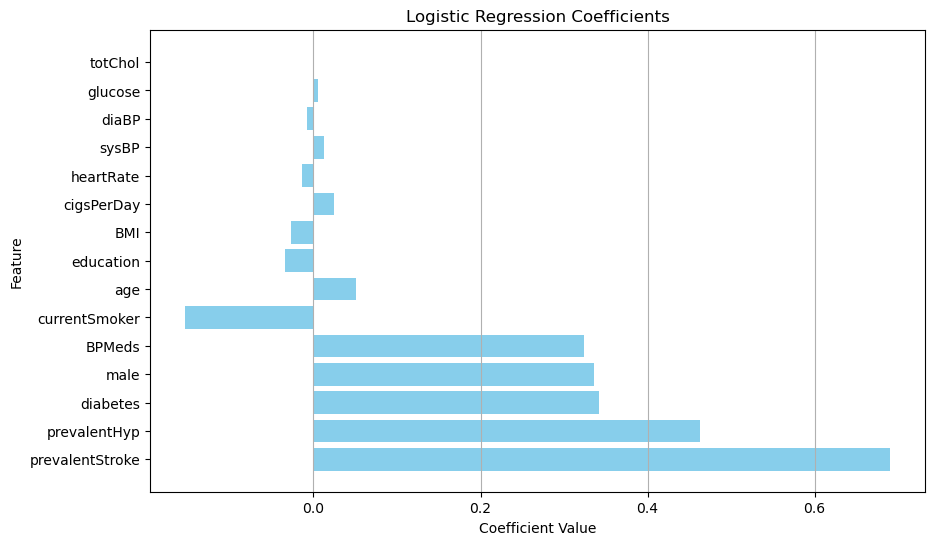

In [245]:
coefficients = Lr.coef_[0]
feature_names = x_train.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

coefficients_df['abs_coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False)

# Plot coefficients on a bar graph
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()
